Homework 4: Sentiment Analysis - Task 2
----

Names & Sections
----
Names: Anisha Kushwaha 6120
Sarthak Kagliwal 6120(Write these in every notebook you submit. For each partner, write down whether you are a 4120 or a 6120 student.)

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier
import numpy as np
# some potentially helpful data structures from collections
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "own_train.txt"
DEV_FILE = "own_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)



In [4]:
X_train, Y_train  = train_tups[0], train_tups[1]
X_dev, Y_dev  = dev_tups[0], dev_tups[1]


In [5]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

vocab = sutils.create_index(X_train)


# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference
# between using binarized features and using counts (non binarized features)

def word_feats(data_to_be_featurized_X, binary) -> dict:
    # STUDENTS IMPLEMENT
    bow = []
    if binary:
        vector = sutils.featurize(vocab, data_to_be_featurized_X, True)
    else:
        vector = sutils.featurize(vocab, data_to_be_featurized_X, False)
    for ind in vector:
        bow.append(dict([(vocab[i], ind[i]) for i in range(len(vocab))]))

    return bow

tr_bin_bow = word_feats(X_train, True)
tr_mul_bow = word_feats(X_train, False)

dev_bin_bow = word_feats(X_dev, True)
dev_mul_bow = word_feats(X_dev, False)

NBtrain_data_bin = []
NBtrain_data_mul = []
for i in range(len(train_tups[0])):
    NBtrain_data_bin.append((tr_bin_bow[i], Y_train[i]))
    NBtrain_data_mul.append((tr_mul_bow[i], Y_train[i]))

# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
# Should take < 10 sec to train (on Felix's computer this takes 0.5 sec)

def train_NBclassifier(tr_data_per, train_data, dev_data):
    tr_data_len = int(len(train_data) * tr_data_per)
    random_indices = np.random.choice(len(train_data), tr_data_len, replace=False)
    # X_tr = train_data[random_indices]
    # Y_tr = train_bow[1][random_indices]
    X_tr = []
    for i in random_indices:
        X_tr.append(train_data[i])
    NBclassifier = NaiveBayesClassifier.train(X_tr)
    NBpred = NBclassifier.classify(dev_data[0])
    print(f'Predicted output for first sample of dev data: {NBpred}')

    return NBclassifier

# test to make sure that you can train the classifier and use it to classify a new example


In [6]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# def NBprediction(model, dev_data):
#     NBpred = [model.classify(dev_data[i]) for i in range(len(dev_data))]
#     return NBpred

def generate_NB_models(tr_data_per, train_data, dev_data, verbose):
    NBtrain_model = train_NBclassifier(tr_data_per, train_data, dev_data[0])
    NB_model_pred = [NBtrain_model.classify(dev_data[0][i]) for i in range(len(dev_data[0]))]
    NB_metrics = sutils.get_prfa(dev_data[1], NB_model_pred, verbose)
    return NB_metrics

NB_Bin_metrics = generate_NB_models(1.0, NBtrain_data_bin, [dev_bin_bow, Y_dev], True)
NB_Mul_metrics = generate_NB_models(1.0, NBtrain_data_mul, [dev_mul_bow, Y_dev], True)

print(f'F1 score binarized BoW: {NB_Bin_metrics[2]}')
print(f'F1 score multinomial BoW: {NB_Mul_metrics[2]}')


Predicted output for first sample of dev data: 0
Precision: 0.79
Recall: 0.42
F1 Score: 0.54
Accuracy: 0.79
Predicted output for first sample of dev data: 0
Precision: 0.77
Recall: 0.40
F1 Score: 0.53
Accuracy: 0.79
F1 score binarized BoW: 0.5441176470588235
F1 score multinomial BoW: 0.5294117647058825


Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0
Predicted output for first sample of dev data: 0


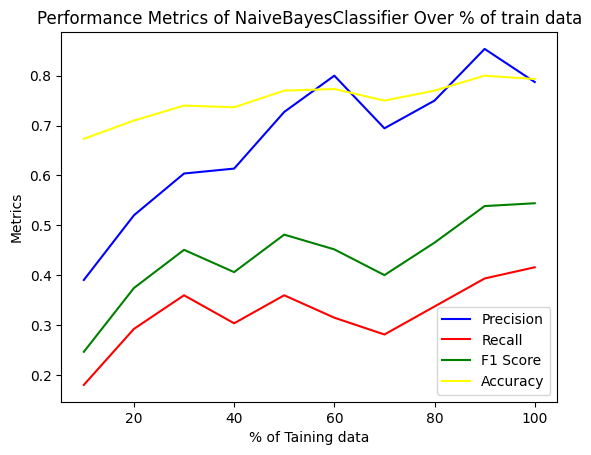

<Figure size 640x480 with 0 Axes>

In [7]:
# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

def generate_graphs(train_data, dev_data):
    prfa_values = [[],[],[],[]]
    training_len = []
    for i in np.arange(0.1, 1.1, 0.1):
        training_len.append(i*100)
        NB_metrics = generate_NB_models(i, train_data, dev_data, False)
        for i in range(len(NB_metrics)):
            prfa_values[i].append(NB_metrics[i])
    # training_len.append(100)
    return training_len, prfa_values

if NB_Bin_metrics[2] > NB_Mul_metrics[2]:
    x_axis, y_axis = generate_graphs(NBtrain_data_bin, [dev_bin_bow, Y_dev])
    # for i in range(len(NB_Bin_metrics)):
    #     y_axis[i].append(NB_Bin_metrics[i])

else:
    x_axis, y_axis, NBmodels = generate_graphs(NBtrain_data_mul, [dev_mul_bow, Y_dev])
    # for i in range(len(NB_Mul_metrics)):
    #     y_axis[i].append(NB_Mul_metrics[i])

sutils.create_training_graph(x_axis, y_axis, 'NaiveBayesClassifier', 'NBgraph1.png')
# takes approximately 3.5sec to run on Felix's computer

Test your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: 0.54
- f1 score multinomial: 0.53